In [1]:
import os
from PIL import Image, ImageFile
import concurrent.futures
from tqdm import tqdm

# 이미지를 트렁케이팅(truncated)한 경우에도 로드할 수 있도록 설정
ImageFile.LOAD_TRUNCATED_IMAGES = True

def check_image(file_path):
    try:
        with Image.open(file_path) as img:
            img.verify()  # 이미지 파일이 유효한지 확인
        return file_path, True
    except (IOError, SyntaxError) as e:
        return file_path, False

def check_and_remove_corrupted_images(directory):
    all_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            all_files.append(file_path)
    
    # 병렬 처리로 이미지 확인
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(check_image, all_files), total=len(all_files), desc=f"Checking {directory}"))
    
    corrupted_files = [file_path for file_path, is_valid in results if not is_valid]
    
    # 손상된 이미지 제거
    for file_path in tqdm(corrupted_files, desc=f"Removing corrupted images in {directory}"):
        print(f"Removing corrupted image: {file_path}")
        os.remove(file_path)
    
    print(f"Total corrupted images removed: {len(corrupted_files)}")

# 훈련 및 검증 데이터셋 디렉토리 경로
train_dir = "C:\\Users\\Admin\\Desktop\\쓰레기\\Training"
val_dir = "C:\\Users\\Admin\\Desktop\\쓰레기\\Validation"

# 손상된 이미지 제거
print("Checking and removing corrupted images in Training directory...")
check_and_remove_corrupted_images(train_dir)
print("Checking and removing corrupted images in Validation directory...")
check_and_remove_corrupted_images(val_dir)

print("Corrupted images removed. Ready to load datasets.")


Checking and removing corrupted images in Training directory...


Checking C:\Users\Admin\Desktop\쓰레기\Training: 100%|██████████| 609927/609927 [06:14<00:00, 1627.61it/s] 
Removing corrupted images in C:\Users\Admin\Desktop\쓰레기\Training: 0it [00:00, ?it/s]


Total corrupted images removed: 0
Checking and removing corrupted images in Validation directory...


Checking C:\Users\Admin\Desktop\쓰레기\Validation: 100%|██████████| 76377/76377 [00:53<00:00, 1435.54it/s]
Removing corrupted images in C:\Users\Admin\Desktop\쓰레기\Validation: 0it [00:00, ?it/s]

Total corrupted images removed: 0
Corrupted images removed. Ready to load datasets.


In [2]:
import os
from PIL import Image, ImageFile
import concurrent.futures
from tqdm import tqdm

# 이미지를 트렁케이팅(truncated)한 경우에도 로드할 수 있도록 설정
ImageFile.LOAD_TRUNCATED_IMAGES = True

def check_image(file_path):
    try:
        with Image.open(file_path) as img:
            img.verify()  # 이미지 파일이 유효한지 확인
            if img.format not in ['JPEG', 'PNG']:  # 허용된 포맷만 확인
                return file_path, False
        return file_path, True
    except (IOError, SyntaxError) as e:
        return file_path, False

def check_and_remove_corrupted_images(directory):
    all_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            all_files.append(file_path)
    
    # 병렬 처리로 이미지 확인
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(check_image, all_files), total=len(all_files), desc=f"Checking {directory}"))
    
    corrupted_files = [file_path for file_path, is_valid in results if not is_valid]
    
    # 손상된 이미지 제거
    for file_path in tqdm(corrupted_files, desc=f"Removing corrupted images in {directory}"):
        print(f"Removing corrupted image: {file_path}")
        os.remove(file_path)
    
    print(f"Total corrupted images removed: {len(corrupted_files)}")

# 훈련 및 검증 데이터셋 디렉토리 경로
train_dir = "C:\\Users\\Admin\\Desktop\\쓰레기\\Training"
val_dir = "C:\\Users\\Admin\\Desktop\\쓰레기\\Validation"

# 손상된 이미지 제거
print("Checking and removing corrupted images in Training directory...")
check_and_remove_corrupted_images(train_dir)
print("Checking and removing corrupted images in Validation directory...")
check_and_remove_corrupted_images(val_dir)

print("Corrupted images removed. Ready to load datasets.")


Checking and removing corrupted images in Training directory...


Checking C:\Users\Admin\Desktop\쓰레기\Training: 100%|██████████| 609927/609927 [06:20<00:00, 1603.00it/s] 
Removing corrupted images in C:\Users\Admin\Desktop\쓰레기\Training: 0it [00:00, ?it/s]


Total corrupted images removed: 0
Checking and removing corrupted images in Validation directory...


Checking C:\Users\Admin\Desktop\쓰레기\Validation: 100%|██████████| 76377/76377 [00:51<00:00, 1496.16it/s]
Removing corrupted images in C:\Users\Admin\Desktop\쓰레기\Validation: 0it [00:00, ?it/s]


Total corrupted images removed: 0
Corrupted images removed. Ready to load datasets.


100%|██████████| 15247/15247 [06:14<00:00, 40.68it/s]


Epoch [1/100] - Training loss: 1.490, Validation loss: 1.008, accuracy: 68.27%
Best model saved at epoch 1.


100%|██████████| 15247/15247 [07:13<00:00, 35.17it/s]


Epoch [2/100] - Training loss: 1.269, Validation loss: 0.999, accuracy: 69.42%
Best model saved at epoch 2.


100%|██████████| 15247/15247 [07:11<00:00, 35.30it/s]


Epoch [3/100] - Training loss: 1.208, Validation loss: 0.888, accuracy: 72.57%
Best model saved at epoch 3.


100%|██████████| 15247/15247 [07:08<00:00, 35.54it/s]


Epoch [4/100] - Training loss: 1.160, Validation loss: 0.855, accuracy: 74.12%
Best model saved at epoch 4.


100%|██████████| 15247/15247 [07:09<00:00, 35.54it/s]


Epoch [5/100] - Training loss: 1.117, Validation loss: 0.852, accuracy: 74.74%
Best model saved at epoch 5.


100%|██████████| 15247/15247 [07:10<00:00, 35.43it/s]


Epoch [6/100] - Training loss: 1.083, Validation loss: 0.863, accuracy: 74.91%


100%|██████████| 15247/15247 [07:09<00:00, 35.53it/s]


Epoch [7/100] - Training loss: 1.068, Validation loss: 0.813, accuracy: 76.19%
Best model saved at epoch 7.


100%|██████████| 15247/15247 [07:08<00:00, 35.55it/s]


Epoch [8/100] - Training loss: 1.041, Validation loss: 0.841, accuracy: 75.91%


100%|██████████| 15247/15247 [07:07<00:00, 35.66it/s]


Epoch [9/100] - Training loss: 1.032, Validation loss: 0.794, accuracy: 77.02%
Best model saved at epoch 9.


100%|██████████| 15247/15247 [07:08<00:00, 35.55it/s]


Epoch [10/100] - Training loss: 1.022, Validation loss: 0.844, accuracy: 77.04%


100%|██████████| 15247/15247 [07:09<00:00, 35.48it/s]


Epoch [11/100] - Training loss: 1.004, Validation loss: 0.848, accuracy: 76.99%


100%|██████████| 15247/15247 [07:08<00:00, 35.62it/s]


Epoch [12/100] - Training loss: 0.990, Validation loss: 0.830, accuracy: 77.84%


100%|██████████| 15247/15247 [07:06<00:00, 35.74it/s]


Epoch [13/100] - Training loss: 0.996, Validation loss: 0.841, accuracy: 77.35%


100%|██████████| 15247/15247 [07:07<00:00, 35.68it/s]


Epoch [14/100] - Training loss: 0.983, Validation loss: 0.866, accuracy: 77.63%


100%|██████████| 15247/15247 [07:07<00:00, 35.64it/s]


Epoch [15/100] - Training loss: 0.972, Validation loss: 0.792, accuracy: 78.80%
Best model saved at epoch 15.


100%|██████████| 15247/15247 [07:07<00:00, 35.68it/s]


Epoch [16/100] - Training loss: 0.966, Validation loss: 0.872, accuracy: 77.35%


100%|██████████| 15247/15247 [07:05<00:00, 35.80it/s]


Epoch [17/100] - Training loss: 0.961, Validation loss: 0.807, accuracy: 78.72%


100%|██████████| 15247/15247 [07:09<00:00, 35.48it/s]


Epoch [18/100] - Training loss: 0.949, Validation loss: 0.835, accuracy: 78.69%


100%|██████████| 15247/15247 [12:16<00:00, 20.70it/s]


Epoch [19/100] - Training loss: 0.945, Validation loss: 0.863, accuracy: 77.88%


100%|██████████| 15247/15247 [07:08<00:00, 35.62it/s]


Epoch [20/100] - Training loss: 0.944, Validation loss: 0.904, accuracy: 77.79%


100%|██████████| 15247/15247 [07:13<00:00, 35.15it/s]


Epoch [21/100] - Training loss: 0.931, Validation loss: 0.902, accuracy: 77.79%


100%|██████████| 15247/15247 [07:16<00:00, 34.96it/s]


Epoch [22/100] - Training loss: 0.933, Validation loss: 0.891, accuracy: 77.98%


100%|██████████| 15247/15247 [07:09<00:00, 35.53it/s]


Epoch [23/100] - Training loss: 0.934, Validation loss: 0.849, accuracy: 78.58%


100%|██████████| 15247/15247 [08:00<00:00, 31.74it/s]


Epoch [24/100] - Training loss: 0.929, Validation loss: 0.903, accuracy: 78.31%


100%|██████████| 15247/15247 [08:09<00:00, 31.16it/s]


Epoch [25/100] - Training loss: 0.919, Validation loss: 0.888, accuracy: 79.07%


100%|██████████| 15247/15247 [08:08<00:00, 31.20it/s]


Epoch [26/100] - Training loss: 0.916, Validation loss: 0.907, accuracy: 78.14%


100%|██████████| 15247/15247 [07:52<00:00, 32.30it/s]


Epoch [27/100] - Training loss: 0.918, Validation loss: 0.856, accuracy: 79.50%


100%|██████████| 15247/15247 [07:47<00:00, 32.61it/s]


Epoch [28/100] - Training loss: 0.909, Validation loss: 0.936, accuracy: 78.06%


100%|██████████| 15247/15247 [07:58<00:00, 31.89it/s]


Epoch [29/100] - Training loss: 0.908, Validation loss: 0.866, accuracy: 78.80%


100%|██████████| 15247/15247 [08:21<00:00, 30.42it/s]


Epoch [30/100] - Training loss: 0.908, Validation loss: 0.885, accuracy: 79.35%


100%|██████████| 15247/15247 [08:19<00:00, 30.53it/s]


Epoch [31/100] - Training loss: 0.903, Validation loss: 0.879, accuracy: 78.69%


100%|██████████| 15247/15247 [08:01<00:00, 31.67it/s]


Epoch [32/100] - Training loss: 0.907, Validation loss: 0.922, accuracy: 78.38%


100%|██████████| 15247/15247 [07:54<00:00, 32.12it/s]


Epoch [33/100] - Training loss: 0.903, Validation loss: 0.868, accuracy: 79.88%


100%|██████████| 15247/15247 [07:54<00:00, 32.16it/s]


Epoch [34/100] - Training loss: 0.900, Validation loss: 0.933, accuracy: 79.17%


100%|██████████| 15247/15247 [07:55<00:00, 32.06it/s]


Epoch [35/100] - Training loss: 0.898, Validation loss: 0.856, accuracy: 79.84%


100%|██████████| 15247/15247 [07:54<00:00, 32.16it/s]


Epoch [36/100] - Training loss: 0.896, Validation loss: 0.938, accuracy: 79.31%


100%|██████████| 15247/15247 [07:33<00:00, 33.65it/s]


Epoch [37/100] - Training loss: 0.897, Validation loss: 0.895, accuracy: 79.08%


100%|██████████| 15247/15247 [07:50<00:00, 32.39it/s]


Epoch [38/100] - Training loss: 0.892, Validation loss: 0.888, accuracy: 80.19%


100%|██████████| 15247/15247 [07:58<00:00, 31.87it/s]


Epoch [39/100] - Training loss: 0.890, Validation loss: 0.964, accuracy: 79.76%


100%|██████████| 15247/15247 [07:50<00:00, 32.40it/s]


Epoch [40/100] - Training loss: 0.886, Validation loss: 0.950, accuracy: 79.28%


100%|██████████| 15247/15247 [07:37<00:00, 33.32it/s]


Epoch [41/100] - Training loss: 0.891, Validation loss: 0.959, accuracy: 78.80%


100%|██████████| 15247/15247 [07:43<00:00, 32.87it/s]


Epoch [42/100] - Training loss: 0.889, Validation loss: 1.000, accuracy: 78.50%


100%|██████████| 15247/15247 [07:46<00:00, 32.69it/s]


Epoch [43/100] - Training loss: 0.892, Validation loss: 0.930, accuracy: 79.80%


100%|██████████| 15247/15247 [07:09<00:00, 35.49it/s]


Epoch [44/100] - Training loss: 0.887, Validation loss: 0.941, accuracy: 79.58%


100%|██████████| 15247/15247 [07:06<00:00, 35.77it/s]


Epoch [45/100] - Training loss: 0.890, Validation loss: 0.917, accuracy: 80.07%


100%|██████████| 15247/15247 [07:14<00:00, 35.08it/s]


Epoch [46/100] - Training loss: 0.880, Validation loss: 0.873, accuracy: 80.40%


100%|██████████| 15247/15247 [07:17<00:00, 34.86it/s]


Epoch [47/100] - Training loss: 0.875, Validation loss: 0.957, accuracy: 78.99%


100%|██████████| 15247/15247 [07:20<00:00, 34.60it/s]


Epoch [48/100] - Training loss: 0.883, Validation loss: 0.913, accuracy: 80.09%


100%|██████████| 15247/15247 [07:34<00:00, 33.56it/s]


Epoch [49/100] - Training loss: 0.878, Validation loss: 0.972, accuracy: 79.29%


100%|██████████| 15247/15247 [07:14<00:00, 35.10it/s]


Epoch [50/100] - Training loss: 0.877, Validation loss: 0.926, accuracy: 80.18%


100%|██████████| 15247/15247 [07:05<00:00, 35.85it/s]


Epoch [51/100] - Training loss: 0.879, Validation loss: 1.004, accuracy: 79.30%


100%|██████████| 15247/15247 [07:07<00:00, 35.64it/s]


Epoch [52/100] - Training loss: 0.883, Validation loss: 0.948, accuracy: 79.78%


100%|██████████| 15247/15247 [07:02<00:00, 36.09it/s]


Epoch [53/100] - Training loss: 0.878, Validation loss: 1.016, accuracy: 79.67%


100%|██████████| 15247/15247 [07:02<00:00, 36.10it/s]


Epoch [54/100] - Training loss: 0.875, Validation loss: 0.960, accuracy: 80.22%


100%|██████████| 15247/15247 [07:00<00:00, 36.22it/s]


Epoch [55/100] - Training loss: 0.876, Validation loss: 0.961, accuracy: 79.69%


100%|██████████| 15247/15247 [06:59<00:00, 36.31it/s]


Epoch [56/100] - Training loss: 0.879, Validation loss: 0.995, accuracy: 79.51%


100%|██████████| 15247/15247 [06:58<00:00, 36.40it/s]


Epoch [57/100] - Training loss: 0.878, Validation loss: 1.038, accuracy: 78.84%


100%|██████████| 15247/15247 [06:59<00:00, 36.34it/s]


Epoch [58/100] - Training loss: 0.868, Validation loss: 0.927, accuracy: 80.68%


100%|██████████| 15247/15247 [07:02<00:00, 36.13it/s]


Epoch [59/100] - Training loss: 0.861, Validation loss: 0.995, accuracy: 79.25%


100%|██████████| 15247/15247 [07:00<00:00, 36.22it/s]


Epoch [60/100] - Training loss: 0.868, Validation loss: 1.049, accuracy: 78.93%


100%|██████████| 15247/15247 [07:31<00:00, 33.79it/s]


Epoch [61/100] - Training loss: 0.862, Validation loss: 0.992, accuracy: 79.83%


100%|██████████| 15247/15247 [07:13<00:00, 35.19it/s]


Epoch [62/100] - Training loss: 0.870, Validation loss: 1.023, accuracy: 79.76%


100%|██████████| 15247/15247 [07:04<00:00, 35.90it/s]


Epoch [63/100] - Training loss: 0.864, Validation loss: 1.010, accuracy: 79.46%


100%|██████████| 15247/15247 [07:04<00:00, 35.94it/s]


Epoch [64/100] - Training loss: 0.869, Validation loss: 0.988, accuracy: 80.63%


100%|██████████| 15247/15247 [07:04<00:00, 35.95it/s]


Epoch [65/100] - Training loss: 0.869, Validation loss: 1.032, accuracy: 79.92%


100%|██████████| 15247/15247 [07:06<00:00, 35.73it/s]


Epoch [66/100] - Training loss: 0.871, Validation loss: 1.021, accuracy: 79.73%


100%|██████████| 15247/15247 [07:11<00:00, 35.34it/s]


Epoch [67/100] - Training loss: 0.875, Validation loss: 1.059, accuracy: 79.79%


100%|██████████| 15247/15247 [07:05<00:00, 35.87it/s]


Epoch [68/100] - Training loss: 0.867, Validation loss: 1.087, accuracy: 79.35%


100%|██████████| 15247/15247 [07:04<00:00, 35.88it/s]


Epoch [69/100] - Training loss: 0.867, Validation loss: 0.957, accuracy: 79.83%


100%|██████████| 15247/15247 [07:07<00:00, 35.65it/s]


Epoch [70/100] - Training loss: 0.866, Validation loss: 1.028, accuracy: 79.33%


100%|██████████| 15247/15247 [07:08<00:00, 35.59it/s]


Epoch [71/100] - Training loss: 0.862, Validation loss: 0.976, accuracy: 80.73%


100%|██████████| 15247/15247 [07:03<00:00, 35.97it/s]


Epoch [72/100] - Training loss: 0.865, Validation loss: 1.059, accuracy: 79.62%


100%|██████████| 15247/15247 [07:06<00:00, 35.72it/s]


Epoch [73/100] - Training loss: 0.874, Validation loss: 1.043, accuracy: 79.66%


100%|██████████| 15247/15247 [07:06<00:00, 35.72it/s]


Epoch [74/100] - Training loss: 0.870, Validation loss: 1.024, accuracy: 79.99%


100%|██████████| 15247/15247 [07:06<00:00, 35.72it/s]


Epoch [75/100] - Training loss: 0.864, Validation loss: 1.107, accuracy: 80.03%


100%|██████████| 15247/15247 [07:05<00:00, 35.86it/s]


Epoch [76/100] - Training loss: 0.858, Validation loss: 1.159, accuracy: 78.67%


100%|██████████| 15247/15247 [07:06<00:00, 35.77it/s]


Epoch [77/100] - Training loss: 0.864, Validation loss: 1.057, accuracy: 80.23%


100%|██████████| 15247/15247 [07:06<00:00, 35.72it/s]


Epoch [78/100] - Training loss: 0.865, Validation loss: 1.087, accuracy: 79.08%


100%|██████████| 15247/15247 [07:06<00:00, 35.76it/s]


Epoch [79/100] - Training loss: 0.867, Validation loss: 1.088, accuracy: 79.83%


100%|██████████| 15247/15247 [07:07<00:00, 35.66it/s]


Epoch [80/100] - Training loss: 0.858, Validation loss: 1.047, accuracy: 80.30%


100%|██████████| 15247/15247 [07:05<00:00, 35.84it/s]


Epoch [81/100] - Training loss: 0.864, Validation loss: 1.006, accuracy: 80.52%


100%|██████████| 15247/15247 [07:09<00:00, 35.54it/s]


Epoch [82/100] - Training loss: 0.865, Validation loss: 1.076, accuracy: 79.79%


100%|██████████| 15247/15247 [07:08<00:00, 35.62it/s]


Epoch [83/100] - Training loss: 0.868, Validation loss: 1.088, accuracy: 79.19%


100%|██████████| 15247/15247 [07:04<00:00, 35.94it/s]


Epoch [84/100] - Training loss: 0.866, Validation loss: 1.039, accuracy: 80.89%


100%|██████████| 15247/15247 [07:06<00:00, 35.71it/s]


Epoch [85/100] - Training loss: 0.863, Validation loss: 1.106, accuracy: 80.06%


100%|██████████| 15247/15247 [07:07<00:00, 35.64it/s]


Epoch [86/100] - Training loss: 0.859, Validation loss: 1.077, accuracy: 80.36%


100%|██████████| 15247/15247 [07:09<00:00, 35.53it/s]


Epoch [87/100] - Training loss: 0.863, Validation loss: 1.142, accuracy: 79.31%


100%|██████████| 15247/15247 [07:07<00:00, 35.67it/s]


Epoch [88/100] - Training loss: 0.864, Validation loss: 1.130, accuracy: 79.70%


100%|██████████| 15247/15247 [07:04<00:00, 35.91it/s]


Epoch [89/100] - Training loss: 0.859, Validation loss: 1.103, accuracy: 80.33%


100%|██████████| 15247/15247 [07:05<00:00, 35.86it/s]


Epoch [90/100] - Training loss: 0.861, Validation loss: 1.204, accuracy: 79.90%


100%|██████████| 15247/15247 [07:05<00:00, 35.80it/s]


Epoch [91/100] - Training loss: 0.863, Validation loss: 1.157, accuracy: 80.26%


100%|██████████| 15247/15247 [07:08<00:00, 35.58it/s]


Epoch [92/100] - Training loss: 0.861, Validation loss: 1.132, accuracy: 80.47%


100%|██████████| 15247/15247 [07:07<00:00, 35.67it/s]


Epoch [93/100] - Training loss: 0.866, Validation loss: 1.104, accuracy: 79.86%


100%|██████████| 15247/15247 [07:05<00:00, 35.79it/s]


Epoch [94/100] - Training loss: 0.865, Validation loss: 1.123, accuracy: 80.09%


100%|██████████| 15247/15247 [07:07<00:00, 35.67it/s]


Epoch [95/100] - Training loss: 0.859, Validation loss: 1.165, accuracy: 79.41%


100%|██████████| 15247/15247 [07:07<00:00, 35.66it/s]


Epoch [96/100] - Training loss: 0.862, Validation loss: 1.229, accuracy: 79.85%


100%|██████████| 15247/15247 [07:07<00:00, 35.67it/s]


Epoch [97/100] - Training loss: 0.863, Validation loss: 1.117, accuracy: 80.48%


100%|██████████| 15247/15247 [07:03<00:00, 35.97it/s]


Epoch [98/100] - Training loss: 0.868, Validation loss: 1.166, accuracy: 79.91%


100%|██████████| 15247/15247 [07:07<00:00, 35.66it/s]


Epoch [99/100] - Training loss: 0.867, Validation loss: 1.172, accuracy: 79.94%


100%|██████████| 15247/15247 [07:05<00:00, 35.83it/s]


Epoch [100/100] - Training loss: 0.866, Validation loss: 1.072, accuracy: 80.20%


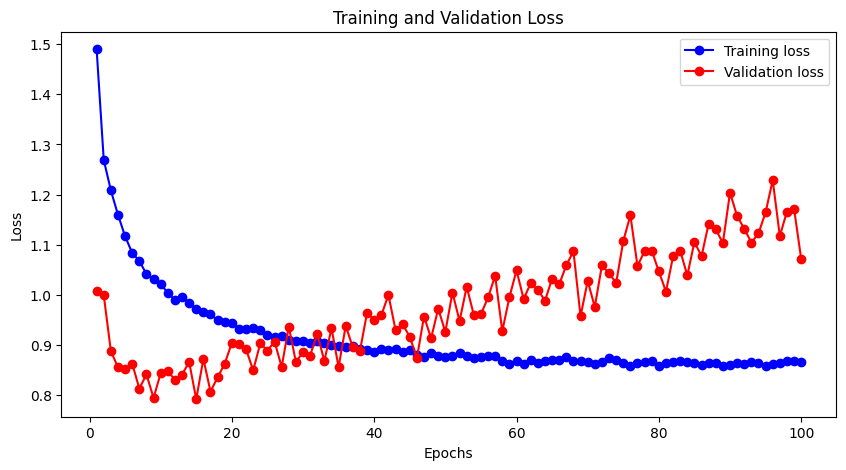

Test Accuracy: 78.80%
Model classes:
0: 가구류
1: 고철류
2: 나무
3: 도기류
4: 비닐
5: 스티로폼
6: 유리병
7: 의류
8: 자전거
9: 전자제품
10: 종이류
11: 캔류
12: 페트병
13: 플라스틱류
14: 형광등
Error: The file C:\Project\Python_basic\깨끗한K세상\test\페트병 쓰레기.jpg does not exist.
Current working directory: c:\Project\Python_basic\깨끗한K세상
Provided path: C:\Project\Python_basic\깨끗한K세상\test\페트병 쓰레기.jpg


c:\Users\Admin\miniconda3\envs\gumi_env310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52884 (\N{HANGUL SYLLABLE KAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\gumi_env310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


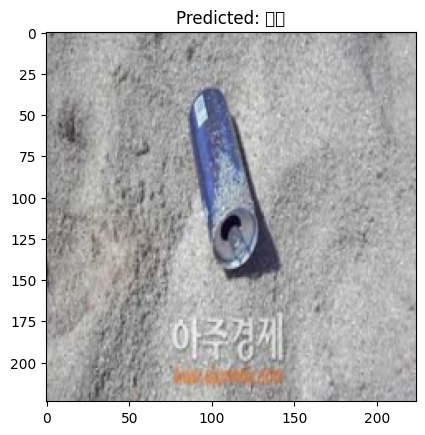

모델 예측 결과 : tensor([11], device='cuda:0')
모델 예측 결과 : 캔류


In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torchmetrics
from PIL import Image
import os

# 랜덤 시드 결정
seed_num = 11
np.random.seed(seed_num)
torch.manual_seed(seed_num)

# 폴더에서 데이터 로드
train_dir = "C:\\Users\\Admin\\Desktop\\쓰레기\\Training"
val_dir = "C:\\Users\\Admin\\Desktop\\쓰레기\\Validation"

train_dataset = ImageFolder(root=train_dir)
val_dataset = ImageFolder(root=val_dir)

# 각 클래스당 10% 데이터 샘플링
def get_subset_indices(dataset, percentage=0.1):
    indices = []
    targets_np = np.array(dataset.targets)
    for class_idx in range(len(dataset.classes)):
        class_indices = np.where(targets_np == class_idx)[0]
        selected_indices = np.random.choice(class_indices, int(len(class_indices) * percentage), replace=False)
        indices.extend(selected_indices)
    return indices

train_indices = get_subset_indices(train_dataset, percentage=0.1)
val_indices = get_subset_indices(val_dataset, percentage=0.1)

train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(val_dataset, val_indices)

# 데이터 변환 설정
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# transform 설정
train_subset.dataset.transform = train_transform
val_subset.dataset.transform = test_transform

# 데이터 로더 설정
batch_size = 4
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

# 사전 훈련된 모델 가져오기 및 수정
transfer_model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# 모든 레이어를 고정
for param in transfer_model.parameters():
    param.requires_grad = False

# 마지막 레이어 교체
num_ftrs = transfer_model.fc.in_features
transfer_model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(1024, len(train_dataset.classes))  # 클래스 수에 맞게 변경
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transfer_model = transfer_model.to(device)

# 손실 함수 및 최적화 알고리즘 설정
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(transfer_model.fc.parameters(), lr=1e-4)

# 모델 학습 함수
def train_and_validate_best(model, train_loader, val_loader, optimizer, criterion, epochs):
    train_losses = []
    val_losses = []
    accuracies = []

    min_val_loss = float('inf')  # 가장 좋은 모델을 추적하기 위한 변수 초기화

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)

        # 검증 과정
        model.eval()
        running_val_loss = 0.0
        accuracy_metric = torchmetrics.Accuracy(task='multiclass', num_classes=len(train_dataset.classes), average='macro').to(device)

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
                accuracy_metric.update(outputs, labels)
            accuracy = accuracy_metric.compute()  # 정확도 계산
            accuracies.append(accuracy.item())
        epoch_val_loss = running_val_loss / len(val_loader)
        val_losses.append(epoch_val_loss)

        print(f'Epoch [{epoch + 1}/{epochs}] - Training loss: {epoch_loss:.3f}, Validation loss: {epoch_val_loss:.3f}, accuracy: {accuracy:.2%}')

        # 가장 좋은 모델만 저장
        if epoch_val_loss < min_val_loss:
            min_val_loss = epoch_val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'Best model saved at epoch {epoch + 1}.')

    return train_losses, val_losses, accuracies

# 모델 학습
history = train_and_validate_best(transfer_model, train_loader, val_loader, optimizer, criterion, epochs=100)

# 학습된 모델 불러오기
transfer_model_best = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
num_ftrs = transfer_model_best.fc.in_features
transfer_model_best.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(1024, len(train_dataset.classes))
)
transfer_model_best.load_state_dict(torch.load('best_model.pth'))
transfer_model_best = transfer_model_best.to(device)

# 학습 및 검증 손실 시각화
train_losses, val_losses, accuracies = history

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, 'bo-', label='Training loss')
plt.plot(epochs, val_losses, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 평가 함수
def evaluate(model, data_loader, device):
    model.eval()
    accuracy_metric = torchmetrics.Accuracy(task='multiclass', num_classes=len(train_dataset.classes), average='macro').to(device)
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            accuracy_metric.update(outputs, labels)
    accuracy = accuracy_metric.compute()
    return accuracy.item()

# 최종 모델 평가
test_accuracy = evaluate(transfer_model_best, val_loader, device)
print(f'Test Accuracy: {test_accuracy:.2%}')

# 클래스 목록 출력
class_names = train_dataset.classes
print("Model classes:")
for idx, class_name in enumerate(class_names):
    print(f"{idx}: {class_name}")

# 평가에 사용할 이미지 로드 및 변환 함수
def load_img(image_path):
    image = Image.open(image_path)
    image = test_transform(image).unsqueeze(0)
    return image

# 예측 함수
def predict_image(model, image_path, class_names):
    model.eval()
    with torch.no_grad():
        try:
            input_image = load_img(image_path).to(device)
            outputs = model(input_image)
            _, preds = torch.max(outputs, 1)

            original_img = input_image.squeeze(0).cpu().detach().numpy().transpose((1, 2, 0))
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            original_img = std * original_img + mean
            original_img = np.clip(original_img, 0, 1)

            plt.imshow(original_img)
            plt.title(f'Predicted: {class_names[preds.item()]}')
            plt.show()
            print("모델 예측 결과 :", preds)
            print("모델 예측 결과 :", class_names[preds.item()])
        except Exception as e:
            print(f"Error loading or processing image: {e}")

# 평가할 이미지 파일 경로 설정
image_path1 = "C:\\Project\\Python_basic\\깨끗한K세상\\test\\페트병 쓰레기.jpg"
image_path2 = "C:\\Project\\Python_basic\\깨끗한K세상\\test\\캔 쓰레기.jpg"

# 파일 존재 여부 확인 및 예측 수행
for image_path in [image_path1, image_path2]:
    if not os.path.exists(image_path):
        print(f"Error: The file {image_path} does not exist.")
        print(f"Current working directory: {os.getcwd()}")
        print(f"Provided path: {image_path}")
    else:
        predict_image(transfer_model_best, image_path, train_dataset.classes)


In [4]:
### 영환이 전에 돌리던거 안되서 갸ㅐㅇ 이걸로 에폭스 100으로 돌렸음
### 일요일 오훅에 가서 ppt에 그 대분류한 내용이랑 압축헤제 캐싱 방법등 넣었는지 확인하고 보충할게

### 오케이오케이 우리 캐싱 10퍼센트만 했는데 성공해서 학습 시키니까 정확도75 나오긴 했거든
### 그래서 데이터 캐싱 내꺼 25 누나꺼 30 형꺼 40 캐싱 중임

# 2024-19:42
### 누나 형꺼 오류 떠서 누나 25 나 30 형 35 하는 중

In [1]:
import koreanize_matplotlib

# 평가에 사용할 이미지 로드 및 변환 함수
def load_img(image_path):
    image = Image.open(image_path)
    image = test_transform(image).unsqueeze(0)
    return image

# 예측 함수
def predict_image(model, image_path, class_names):
    model.eval()
    with torch.no_grad():
        try:
            input_image = load_img(image_path).to(device)
            outputs = model(input_image)
            _, preds = torch.max(outputs, 1)

            original_img = input_image.squeeze(0).cpu().detach().numpy().transpose((1, 2, 0))
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            original_img = std * original_img + mean
            original_img = np.clip(original_img, 0, 1)

            plt.imshow(original_img)
            plt.title(f'Predicted: {class_names[preds.item()]}')
            plt.axis('off')  # 좌표 축 제거
            plt.show()
            print("모델 예측 결과 :", preds)
            print("모델 예측 결과 :", class_names[preds.item()])
        except Exception as e:
            print(f"Error loading or processing image: {e}")

# 평가할 이미지 파일 경로 설정
image_path1 = "C:\\Project\\Python_basic\\깨끗한K세상\\test\\페트병 쓰레기.jpg"
image_path2 = "C:\\Project\\Python_basic\\깨끗한K세상\\test\\유리병 쓰레기.jpg"

# 파일 존재 여부 확인 및 예측 수행
for image_path in [image_path1, image_path2]:
    if not os.path.exists(image_path):
        print(f"Error: The file {image_path} does not exist.")
        print(f"Current working directory: {os.getcwd()}")
        print(f"Provided path: {image_path}")
    else:
        predict_image(transfer_model_best, image_path, train_dataset.classes)


NameError: name 'os' is not defined

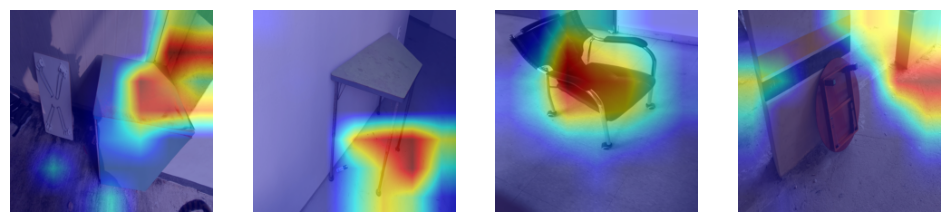

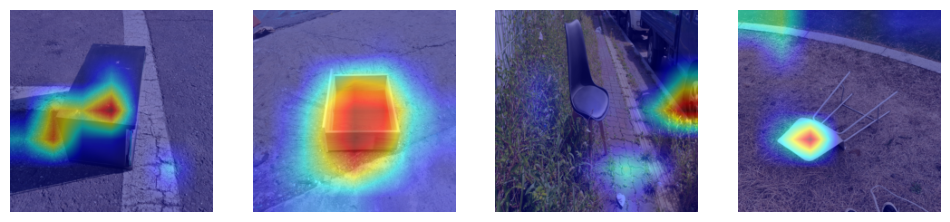

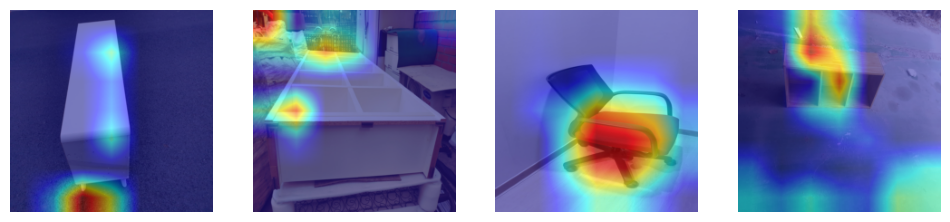

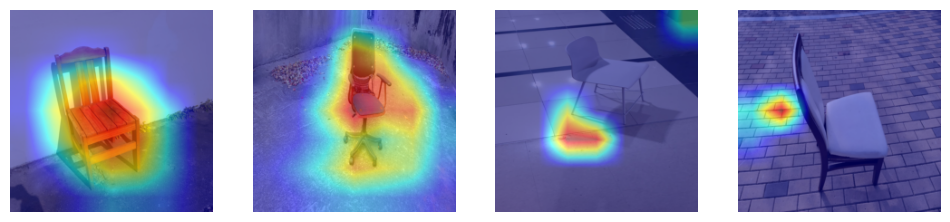

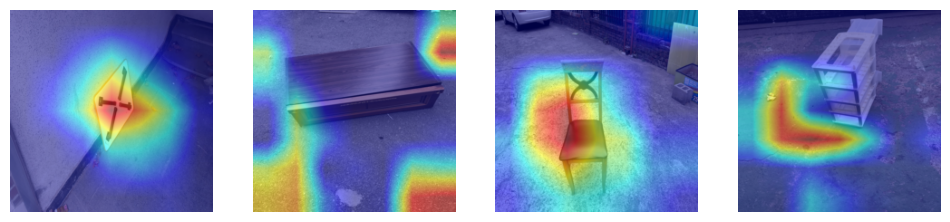

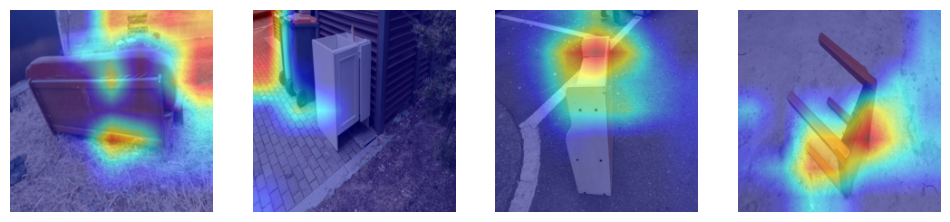

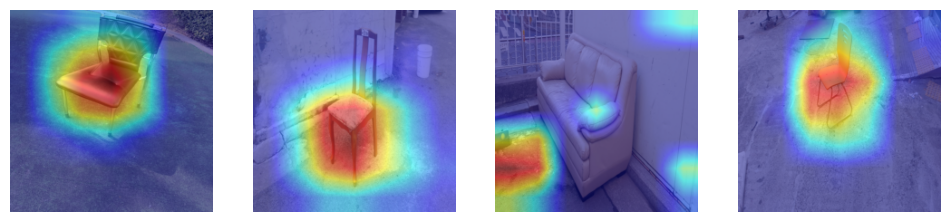

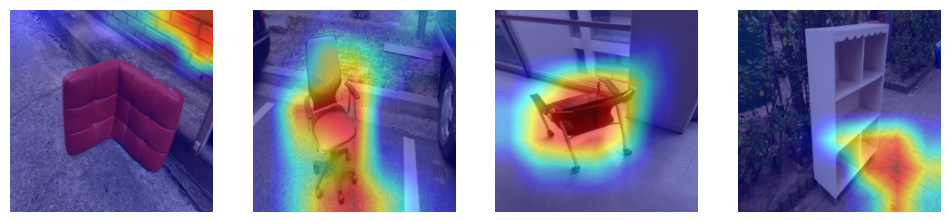

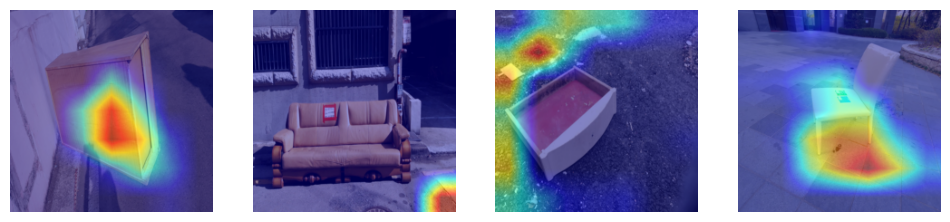

In [14]:
# 데이터 로더 설정
batch_size = 4
test_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

### Xai 사용해보기
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus
from pytorch_grad_cam.utils.image import show_cam_on_image

model_grad_cam = transfer_model_best
model_grad_cam.to(device)
model_grad_cam.eval()

# tensor 이미지를 numpy 이미지로 변환하는 함수
def tensor_to_img(img_tensor):
    img = img_tensor.cpu().detach().numpy().transpose((1,2,0))

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = img * std + mean
    img = np.clip(img, 0, 1)
    return img

target_layers = [model_grad_cam.layer4[-1]] # 마지막 레이어를 타겟으로

# Grad-CAM 시각화
cam = GradCAM(model=model_grad_cam, target_layers=target_layers)

for inputs, labels in test_loader:
    inputs = inputs.to(device)

    # 시각화 해보기
    plt.figure(figsize=(12, 3))
    for idx, image in enumerate(inputs, start=1):
        input_image = image.unsqueeze(0)
        grayscale_cam = cam(input_tensor=input_image, targets=None)[0]
        original_image = tensor_to_img(image)
        cam_image = show_cam_on_image(original_image, grayscale_cam, use_rgb=True)

        plt.subplot(1, len(inputs), idx)
        plt.imshow(cam_image)
        plt.axis('off')
    plt.show()

# Grad-CAM++ 시각화
cam = GradCAMPlusPlus(model=model_grad_cam, target_layers=target_layers)

for inputs, labels in test_loader:
    inputs = inputs.to(device)

    # 시각화 해보기
    plt.figure(figsize=(12, 3))
    for idx, image in enumerate(inputs, start=1):
        input_image = image.unsqueeze(0)
        grayscale_cam = cam(input_tensor=input_image, targets=None)[0]
        original_image = tensor_to_img(image)
        cam_image = show_cam_on_image(original_image, grayscale_cam, use_rgb=True)

        plt.subplot(1, len(inputs), idx)
        plt.imshow(cam_image)
        plt.axis('off')
    plt.show()
